<a href='https://www.latos.ai'> <img src='../logo_latos.jpeg' style="width: 200px;" align="right"/></a>
*Esse notebook faz parte do curso de [Python e Ciência de Dados para a Indústria](https://www.latos.ai/academy/python-e-ciencia-de-dados) da [Latos Academy](https://www.latos.ai).*

Latos© copyright 2022. All Rights Reserved.

In [1]:
from pathlib import Path
import datetime as dt

import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

my_figsize = (15, 8)

## Base de dados Wine Quality

Carregue a base de dados em winequality-red.csv

In [2]:
root_dir = Path.cwd().parents[1]
data_dir = root_dir / 'data'

data_red = pd.read_csv(data_dir / 'winequality-red.csv', sep=';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Busque informações sobre a base de dados:
* Onde foi coletado?
* O que significa cada variável?
* Quais possíveis objetivos para a classificação, regressão e clusterização seriam possíveis utilizando essa base de dados?

fonte: https://archive.ics.uci.edu/ml/datasets/wine+quality

**Respostas**

* Onde foi coletado?

Os dados são amostras de vinho verde e vermelho do norte de Portugal. O objetivo é modelar a qualidade do vinho com base em testes físico-químicos. 

* O que significa cada variável?

Variáveis:
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)



Faça descobertas sobre os dados

* quais os tipos das variáveis? Existem valores nulos?

In [3]:
data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* quais são as informações estatísticas básicas de cada variável?

In [4]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* quantos dados de cada qualidade (3, 4, 5, ..., 8) estão disponíveis?

In [5]:
data_red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

* que variáveis são fortemente correlacionadas?

<AxesSubplot:>

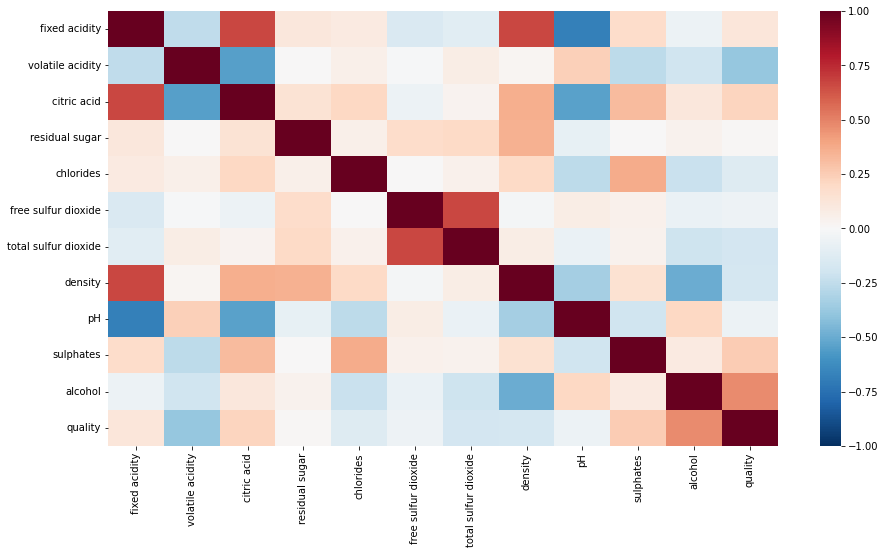

In [6]:
# análise de correlação
plt.figure(figsize=my_figsize)
sns.heatmap(data_red.corr(), cmap="RdBu_r", vmin=-1, vmax=1)

Os pares de variáveis álcool/qualidade e free-sulfur-dioxide/total-sulfur-dioxide são positivamente relacionadas. Os pares ácido volátil/qualidade são negativamente correlacinadas.

* existem outliers?

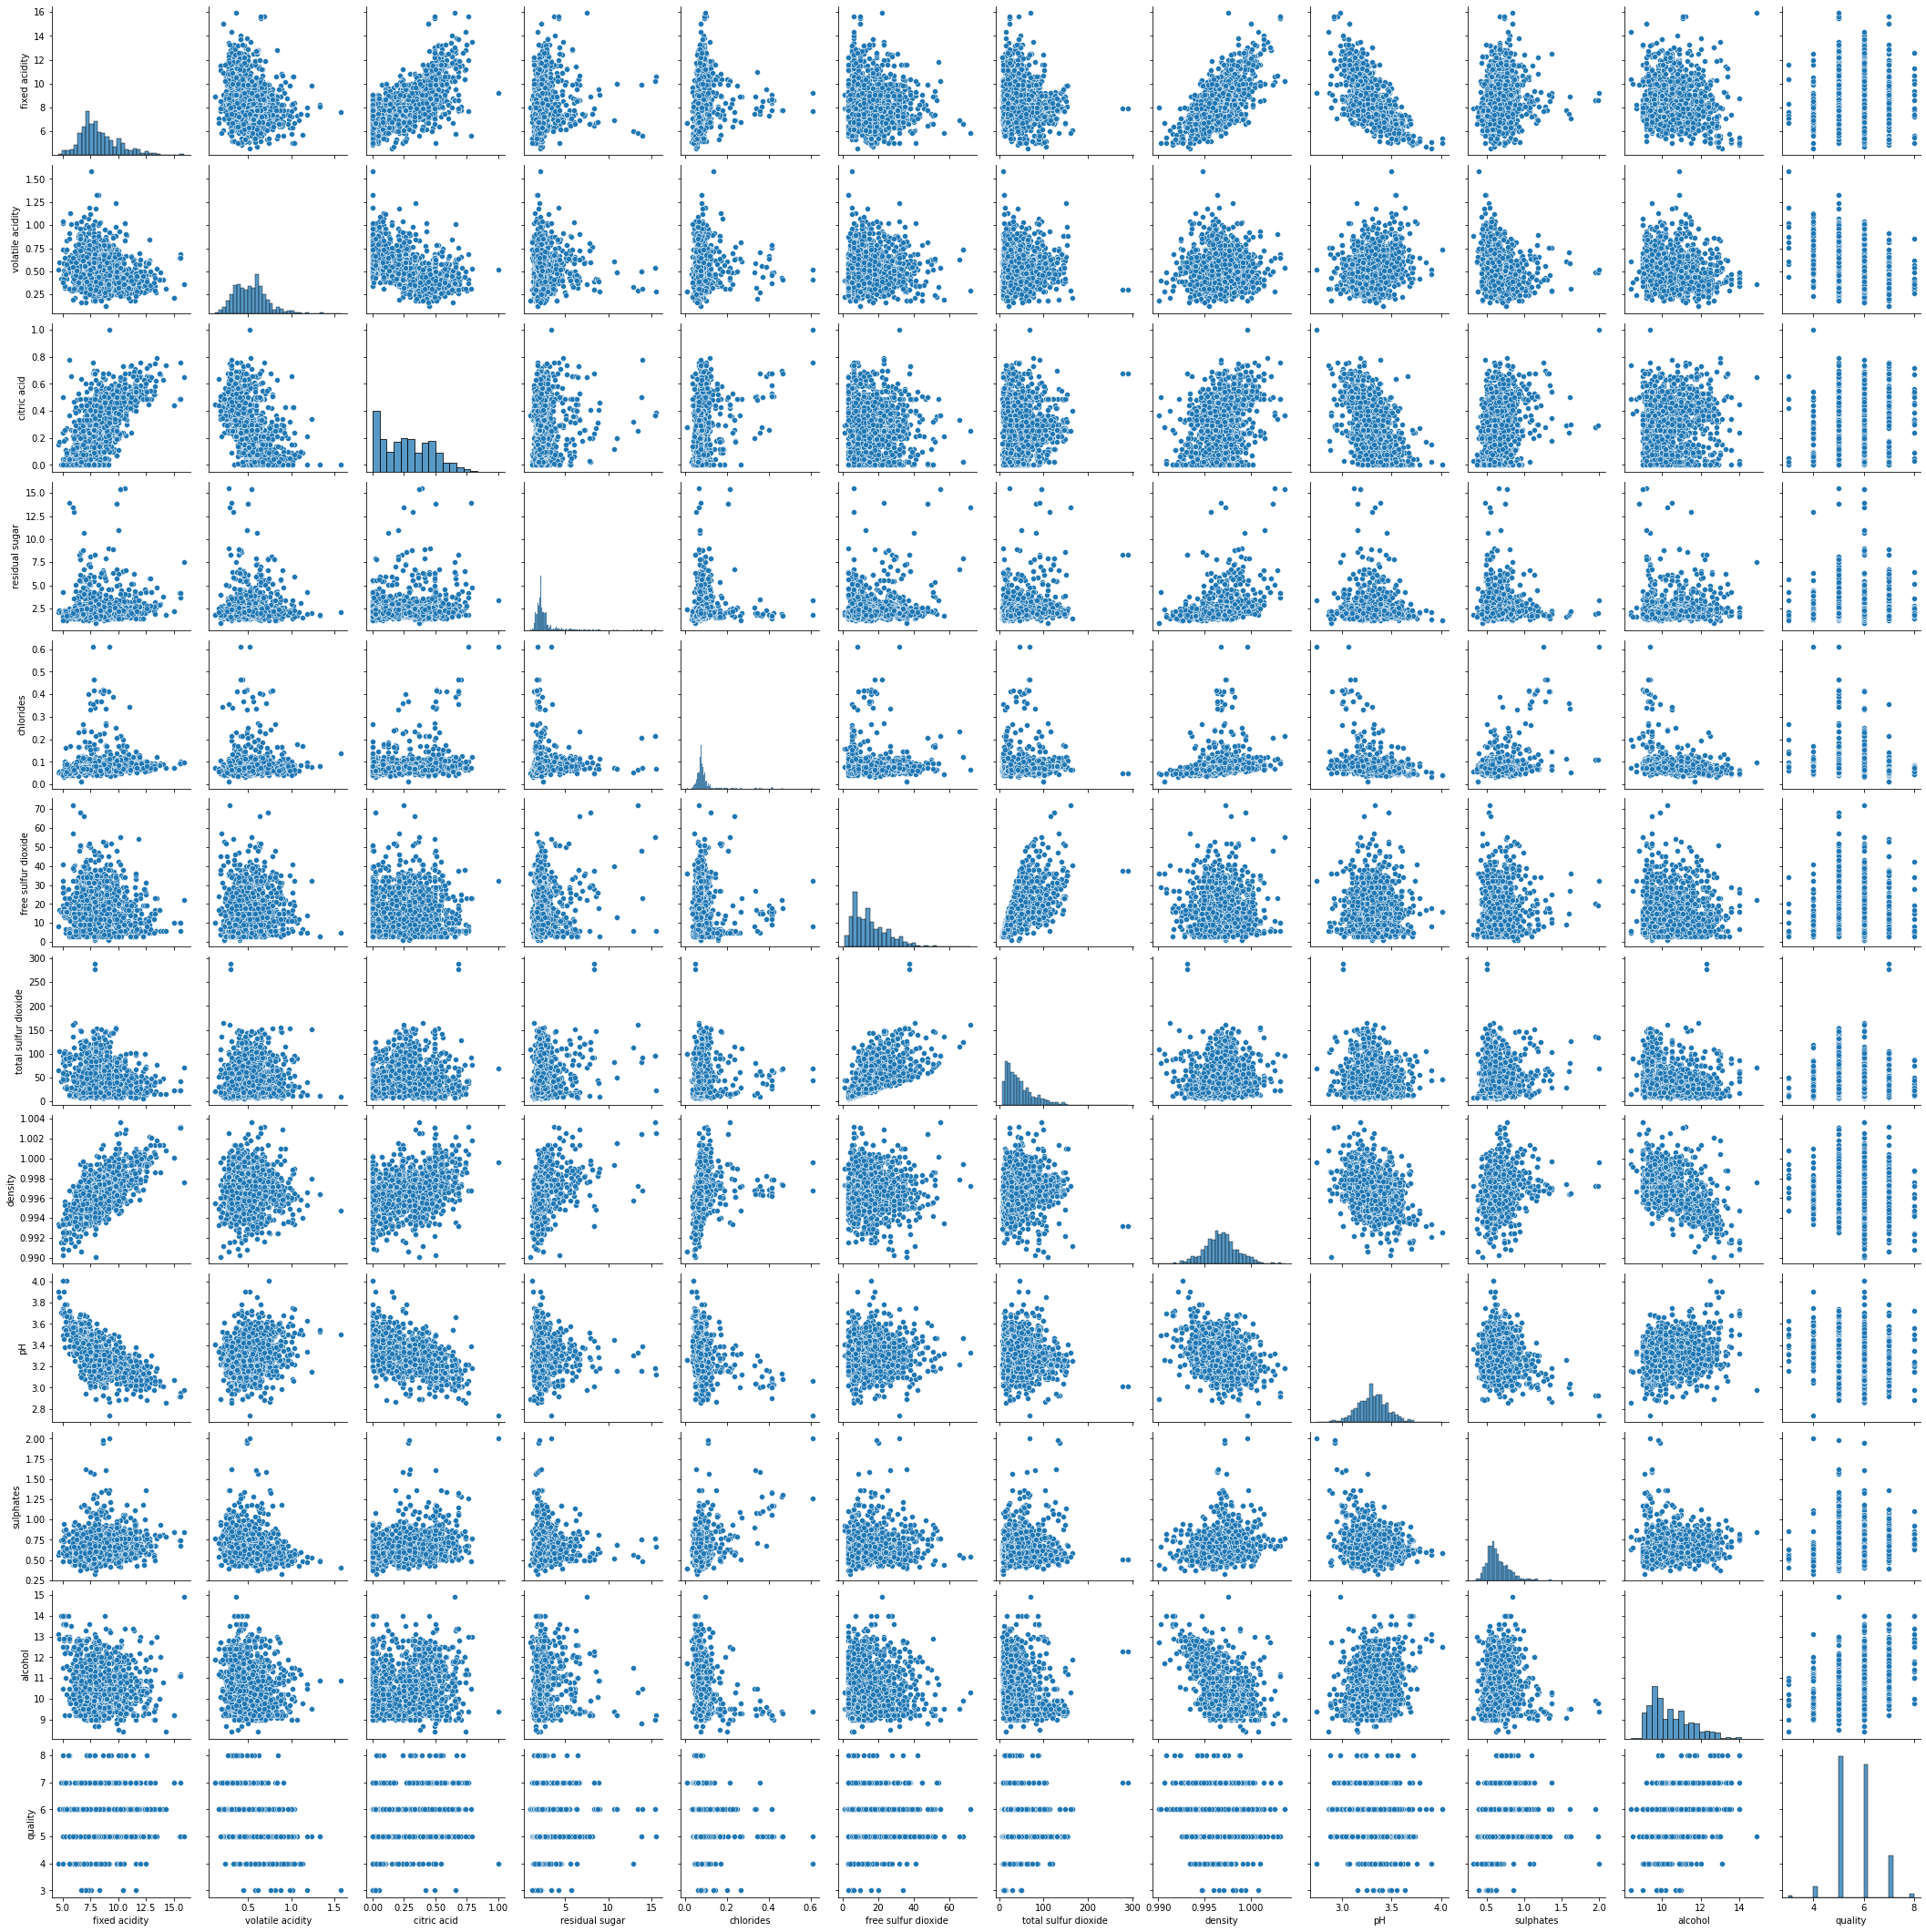

In [7]:
sns.pairplot(data_red)

<AxesSubplot:>

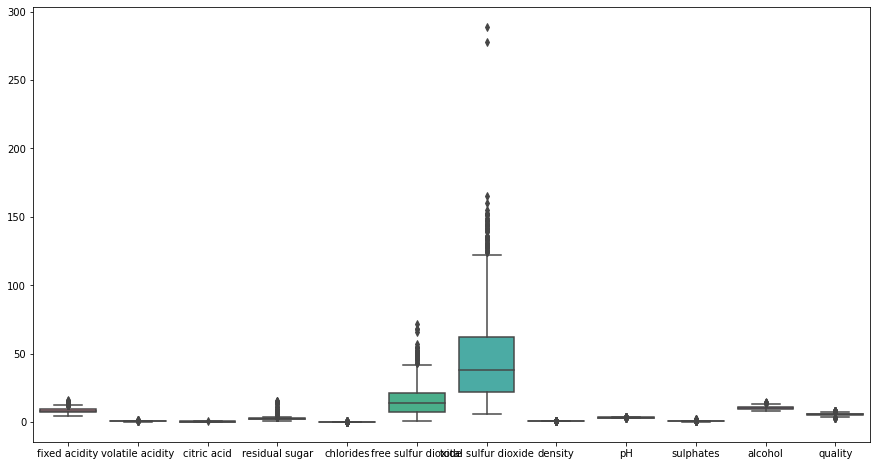

In [8]:
plt.figure(figsize=my_figsize)
sns.boxplot(data=data_red)

In [9]:
cols = data_red.columns[:11]

Q1 = data_red[cols].quantile(0.25)
Q3 = data_red[cols].quantile(0.75)
IQR = Q3 - Q1

np.sum(data_red[cols] < (Q1 - 1.5 * IQR)) + np.sum(data_red[cols] > (Q3 + 1.5 * IQR))

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
dtype: int64

É possível identificar outliers através dos boxplot e da metodologia com interquartis.

## Dados de malhas de controle

Carregue a base de dados em raw.h5

In [10]:
data = pd.HDFStore(data_dir / 'raw.h5', mode='r')

Para a malha FIC14, plote os sinais PV e SP no mesmo gráfico.

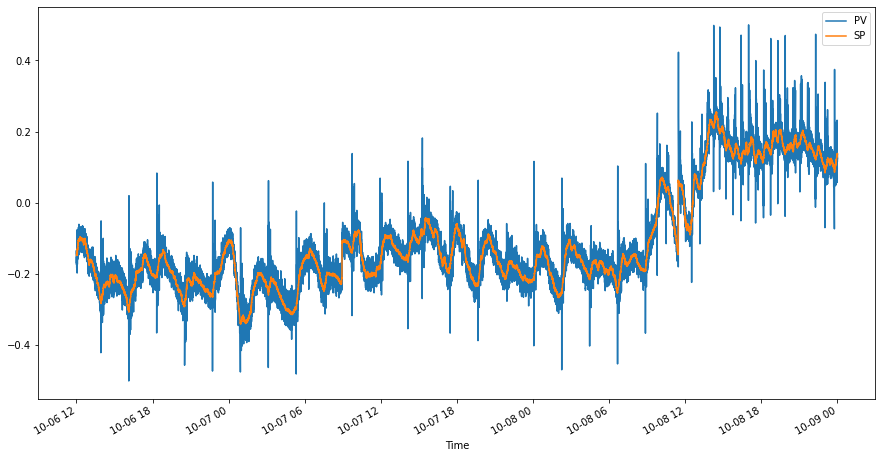

In [11]:
plt.figure(figsize=my_figsize)

loop = '/FIC14'

pv = data[loop+'/PV']['Values']
sp = data[loop+'/SP']['Values']

pv.plot(label='PV')
sp.plot(label='SP')


plt.legend()

Selecione os dados para o período entre dt.datetime(2017, 10, 8, 13) e dt.datetime(2017, 10, 8, 14) e plote os dados novamente. Assim conseguimos entender melhor o comportamento dos dados.


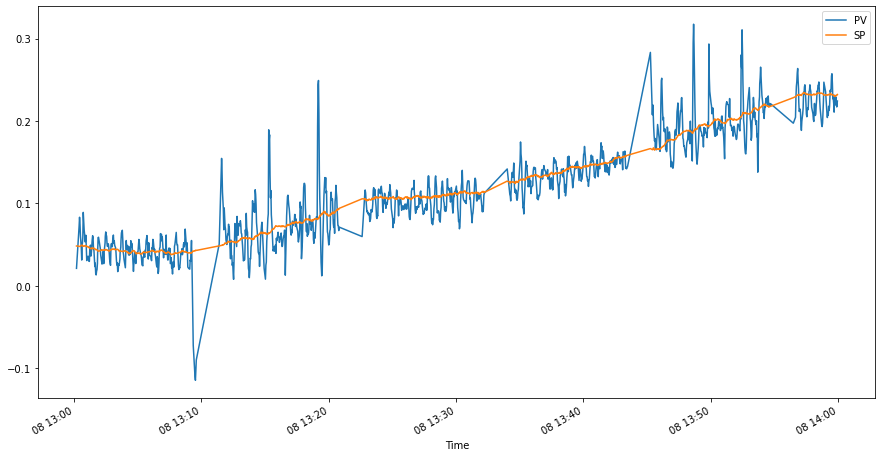

In [12]:
ini = dt.datetime(2017, 10, 8, 13)
fim = dt.datetime(2017, 10, 8, 14)

pv_select = pv[(pv.index > ini) & (pv.index < fim)]
sp_select = sp[(sp.index > ini) & (sp.index < fim)]

plt.figure(figsize=my_figsize)
pv_select.plot(label='PV')
sp_select.plot(label='SP')
plt.legend()

Reamostre os sinais para amostragem 1 mituto e plote os dados. Notou algum problema?

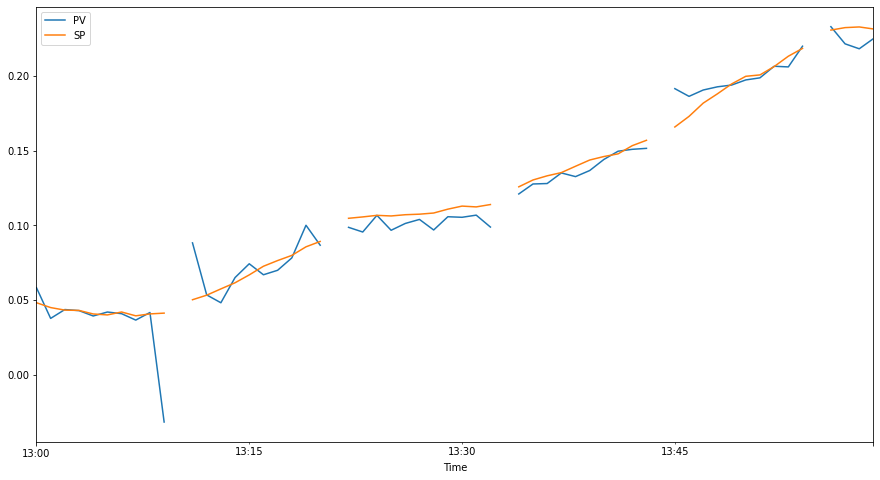

In [13]:
plt.figure(figsize=my_figsize)
pv_select.resample('1min').mean().plot(label='PV')
sp_select.resample('1min').mean().plot(label='SP')
plt.legend()

As informações de alta frequência foram perdidas. Dependendo do problema que queremos respolver, essas informações são importantes.

Ignore a reamostragem anterior e reamostre para 10 segundos. Qualquer dúvida, consulte a documentação do Pandas para o método "resample".

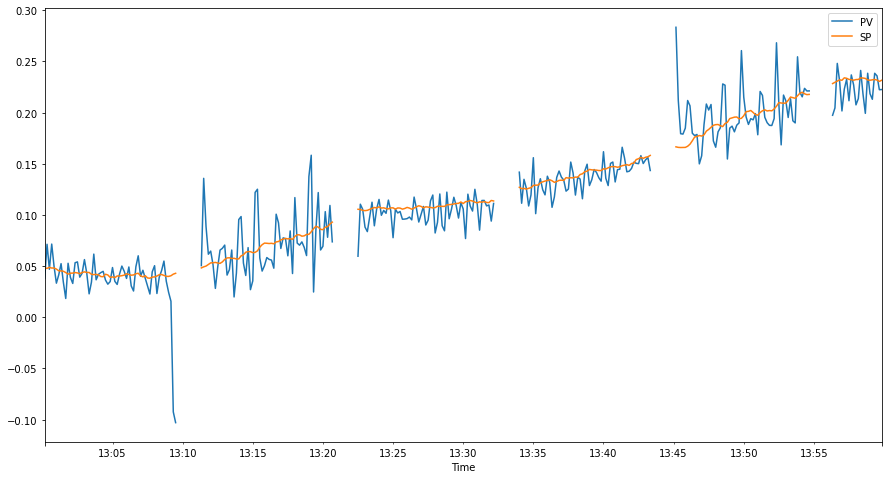

In [14]:
pv_10s = pv_select.resample('10s').mean()
sp_10s = sp_select.resample('10s').mean()


plt.figure(figsize=my_figsize)
pv_10s.plot(label='PV')
sp_10s.plot(label='SP')
plt.legend()

Verifique se existe valores NaN nos dados amostrados (valores faltantes). Se sim, complete os valores com o valor anterior. Dica: procure pelo metodo fillna do Pandas.


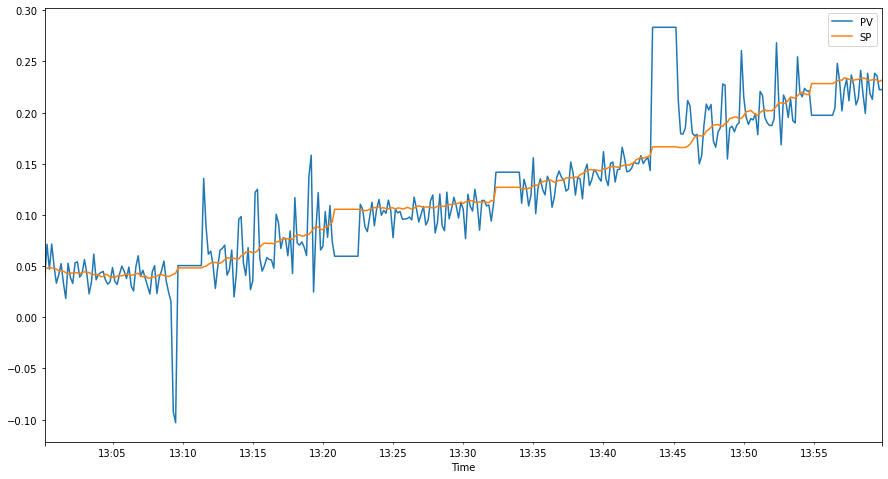

In [15]:
plt.figure(figsize=my_figsize)
pv_10s.fillna(method="bfill").plot(label='PV')
sp_10s.fillna(method="bfill").plot(label='SP')
plt.legend()

Crie um indicador que conte o número de vezes em que a diferença absoluta entre os sinais PV e SP é maior que 0,1.

In [16]:
count = 0
for index in range(len(pv_10s)):
    dif = np.abs(sp_10s.iloc[index] - pv_10s.iloc[index])
    if dif > 0.1:
        count += 1
count

3

Plot os sinais PV e SP da malha '/FIC37'. Consegue observar algum problema?

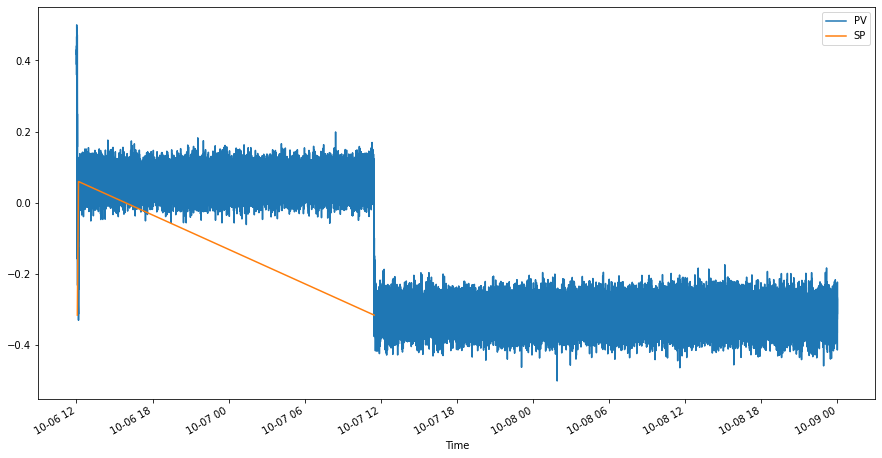

In [17]:
plt.figure(figsize=my_figsize)

loop = '/FIC37'

pv = data[loop+'/PV']['Values']
sp = data[loop+'/SP']['Values']

pv.plot(label='PV')
sp.plot(label='SP')


plt.legend()

Temos poucos valores para o SP. A causa pode ser a compressão com limites inadequados.

Plot os sinais PV e SP da malha '/FIC41'. Consegue observar algum problema?

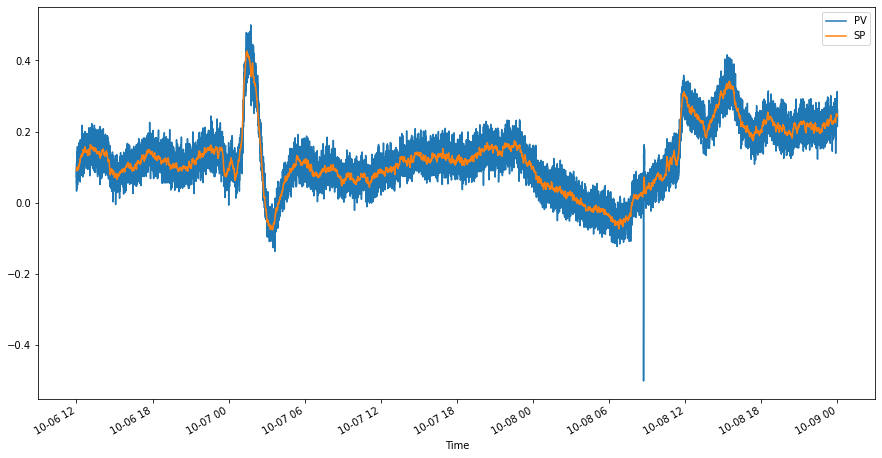

In [18]:
plt.figure(figsize=my_figsize)

loop = '/FIC41'

pv = data[loop+'/PV']['Values']
sp = data[loop+'/SP']['Values']

pv.plot(label='PV')
sp.plot(label='SP')


plt.legend()

Presença de outlier.

Plot os sinais PV e SP da malha '/FIC19'. Consegue observar algum problema?

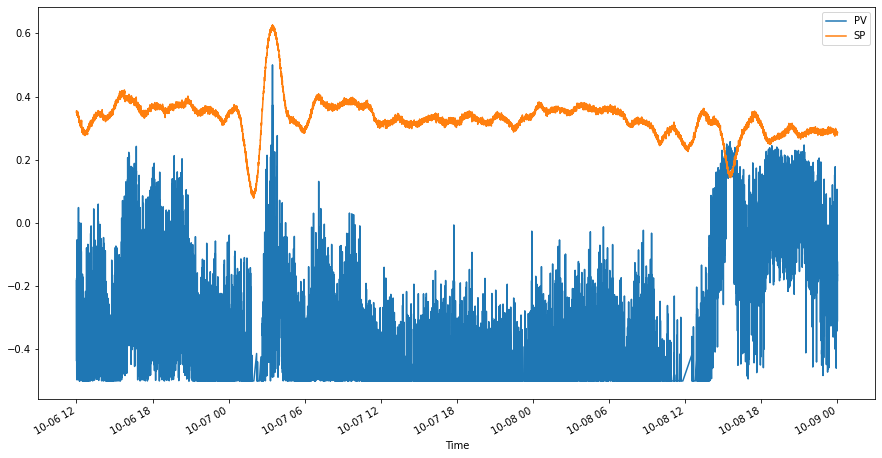

In [19]:
plt.figure(figsize=my_figsize)

loop = '/FIC19'

pv = data[loop+'/PV']['Values']
sp = data[loop+'/SP']['Values']

pv.plot(label='PV')
sp.plot(label='SP')


plt.legend()

A variável PV parece estar saturada. Essa se mantém em um limite mínimo em vários momentos. Problemas desse tipo precisam ser melhor avalidos no processo. Pode ser que tenhamos problema de dimensionamento de algum equipamento.